# Maximum-likelihood estimate for mean lifetime in radiactive decay

## Tasks

a) The maximum likelihood estimator for the mean lifetime $\tau$ of a radioactive decay desribed by the distribution

$$ f(t, \tau) = \frac{1}{\tau} e^{-t/\tau}$$

is give by 

$$\hat \tau = \frac{1}{n} \sum_{i=1}^n t_i.$$

The standard deviation of $\hat \tau$ can be estimated as 

$$\sigma_\tau^2 = - \left(\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-1}$$

Use that to show that the uncertainty of $\hat \tau$ is given by $\sigma_\tau = \frac{\hat \tau}{\sqrt{n}}$

b) Use the function *generate_data* defined below to generate a data set with 30 and 300 samples for $\tau = 2$, respectively. Plot the log-likelihood function $\ln L(\tau)$ along with the parabolic approximation. 

$$ \ln L(\tau) \approx \ln L_\mathrm{max} - \frac{(\tau - \hat \tau)^2}{2 \sigma^2}$$

What can you conclude about the validity of the approximtion as the sample size increases?

c) Generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. How often does the true value lie in this interval? What is your expection for the correspinding probability?


### Hints

It is recommended to not start coding right away. Try to really understand how the Likelihood looks first. Realize, what the Likelihood is a function of and what it describes.


## Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(tau, n_samples):
    return np.random.exponential(tau, n_samples)

a.) Given the probability distribution $f(t_i, \tau)$ for the parameter $\tau$ and a set $(t_1, ..., t_n)$ of data, the likelihood-function is calculated as follows:
$$ L(t, \tau) = \prod_{i=1}^n f(t_i, \tau) $$
The logarithmic likelihood-function is
$$ \text{ln} L(t, \tau) = \sum_{i=1}^n \text{ln} f(x_i, \tau) $$
The logarithmic distribution in this specific problem is easily determined to be
$$ \text{ln } f(t_i, \tau) = -\text{ln}\tau - \frac{t_i}{\tau} $$
Using the formula given above, we can now calculate the standard deviation of  the estimator $\hat{\tau}$:
$$ \sigma_\tau^2 = - \left(\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-1} =  \left( \sum_{i=1}^n\frac{\partial}{\partial \tau} \left(\frac{1}{\tau}-\frac{t_i}{\tau^2}\right) \Big|_{\tau = \hat \tau} \right)^{-1} =\left(  \sum_{i=1}^n\left(-\frac{1}{\tau^2}+\frac{2t_i}{\tau^3} \right) \Big|_{\tau = \hat \tau} \right)^{-1} $$
$$ = \left( -\frac{n}{\hat \tau^2} + \frac{2}{\hat\tau^3}\sum_{i=1}^n t_i \right)^{-1}  = \left( -\frac{n}{\hat \tau^2} + \frac{2n}{\hat\tau^3}\cdot \hat\tau\right)^{-1} = \frac{\hat \tau^2}{n} $$
This shows, that the uncertainty of the estimator is $\sigma_\tau = \frac{\hat\tau}{\sqrt{n}}$.

b.) Using the generate_data function written above, we will generate sets of 30 and 300 samples with a lifetime of $\tau=2$.

In [75]:
data_30 = generate_data(2, 30)
data_300 = generate_data(2, 300)

In [76]:
def log_likelihood(tau, data):
    return np.sum(-np.log(tau) -data/tau)

def parabolic_approx(data, tau, n_samples):
    ln_L_max = np.amax(log_likelihood(tau, data))
    tau_hat = 1/n_samples*np.sum(data)
    sigma = tau_hat/np.sqrt(n_samples)
    return ln_L_max-(tau-tau_hat)**2/(2*sigma**2)


tau_cont = np.linspace(0.1, 4, 200)
log_like_30 = []
log_like_300 = []
approx_30 = []
approx_300 = []

for tau in tau_cont:
    log_like_30.append(log_likelihood(tau, data_30))
    log_like_300.append(log_likelihood(tau, data_300))
    approx_30.append(parabolic_approx(data_30, tau, 30))
    approx_300.append(parabolic_approx(data_300, tau, 300))


The red box above warns us that we are attempting to divide by zero, however this is not a problem as the first entry in the array tau_cont is simply left out when plotting.

Text(0, 0.5, 'log likelihood ln$L(\\tau)$')

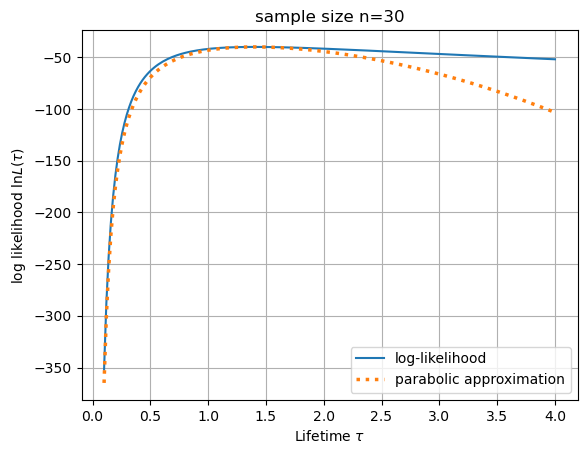

In [77]:
plt.plot(tau_cont, log_like_30, label='log-likelihood')
plt.plot(tau_cont, approx_30, label='parabolic approximation', linestyle=':', linewidth=2.5)
plt.grid()
plt.title('sample size n=30')
plt.legend()
plt.xlabel(r'Lifetime $\tau$')
plt.ylabel(r'log likelihood ln$L(\tau)$')


Text(0, 0.5, 'log likelihood ln$L(\\tau)$')

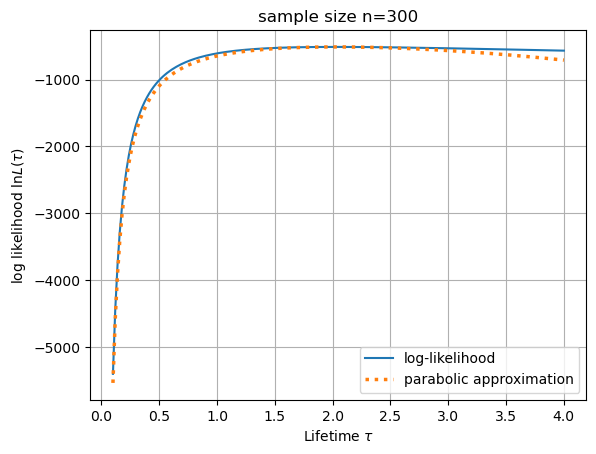

In [78]:
plt.plot(tau_cont, log_like_300, label='log-likelihood')
plt.plot(tau_cont, approx_300, label='parabolic approximation', linestyle =':', linewidth=2.5)
plt.grid()
plt.title('sample size n=300')
plt.legend()
plt.xlabel(r'Lifetime $\tau$')
plt.ylabel(r'log likelihood ln$L(\tau)$')

Through visual comparison of the two log-likelihood graphs plotted alongside their respective parabolic approximations, we can see that the approximation becomes much more accurate as the sample size increases.

c.) We will now use the generate_data function to generate 1000 data sets with 500 samples each. For all of these we will calculate the estimator $\hat\tau$ as well as the uncertainty $\sigma_{\hat\tau}$ of the estimator. Then we will decide, whether the actual lifetime $\tau =2$ lies within the 1$\sigma$-range of the estimator.

In [53]:
counter = 0

for i in range (0,1000):
    data = generate_data(2,500)
    tau_hat = 1/500 * np.sum(data)
    sigma_tau_hat = tau_hat/np.sqrt(500)
    if 2 >= tau_hat-sigma_tau_hat and 2 <= tau_hat+sigma_tau_hat:
        counter = counter+1

print(counter/1000)

0.682


Using the method above, we determined that the true value was in the 1$\sigma$-range of the estimator in 68.2% of the data sets which we generated. By re-running the exact same code, we got slightley different percentages each time, which is attributable to the fact that the data sets are generated randomly.